# Made by Bohdan Bilokon, FB-11mp

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import string

from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from nltk.corpus import stopwords

%matplotlib inline

In [2]:
df = pd.read_csv("emails.csv", index_col = False)
df.drop(columns='Email No.', inplace=True)

In [3]:
df.shape

(5172, 3001)

In [4]:
df.fillna(0)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [5]:
features = df.iloc[:,:-1]
features

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
labels = df.iloc[:,-1]
labels

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.20, random_state = 0)

X_train = X_train.values.reshape((4137, 3000, 1))
X_test = X_test.values.reshape((1035, 3000, 1))

## 1) Fully connected feed-forward network

dataset: [SMS Spam Collection v.1](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)

In [8]:
sequential_model = keras.Sequential()
sequential_model.add(Dense(128, input_shape=(3000,), activation='relu'))
sequential_model.add(Dense(128, activation='relu'))
sequential_model.add(Dense(1, activation='sigmoid'))

sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384128    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 400,769
Trainable params: 400,769
Non-trainable params: 0
_________________________________________________________________


In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = sequential_model.fit(X_train, Y_train, batch_size=16, epochs=15, validation_split=0.2, workers=-1, callbacks = [callback])

Epoch 1/15
207/207 [==============================] - 2s 7ms/step - loss: 0.3655 - accuracy: 0.8918 - val_loss: 0.2133 - val_accuracy: 0.9529
Epoch 2/15
207/207 [==============================] - 1s 6ms/step - loss: 0.1418 - accuracy: 0.9655 - val_loss: 0.0818 - val_accuracy: 0.9819
Epoch 3/15
207/207 [==============================] - 1s 6ms/step - loss: 0.0880 - accuracy: 0.9782 - val_loss: 0.0638 - val_accuracy: 0.9819
Epoch 4/15
207/207 [==============================] - 1s 6ms/step - loss: 0.1816 - accuracy: 0.9707 - val_loss: 0.1506 - val_accuracy: 0.9577
Epoch 5/15
207/207 [==============================] - 1s 5ms/step - loss: 0.0396 - accuracy: 0.9885 - val_loss: 0.0550 - val_accuracy: 0.9843
Epoch 6/15
207/207 [==============================] - 1s 5ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.0721 - val_accuracy: 0.9843
Epoch 7/15
207/207 [==============================] - 1s 5ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.0674 - val_accuracy: 0.9843
Epoch 

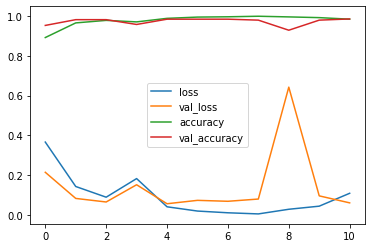

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [11]:
score = sequential_model.evaluate(X_test, Y_test)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9845
Test score: 0.04490905627608299
Test accuracy: 0.9845410585403442


## 2) Convolutional neural network

dataset: [70 Dog Breeds-Image Data Set](https://www.kaggle.com/gpiosenka/70-dog-breedsimage-data-set)

In [12]:
dogs_dir = 'dogs_new/'
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [13]:
train_data = image_generator.flow_from_directory(directory=dogs_dir+'train', batch_size=16, 
                                                     shuffle=True, class_mode='categorical')

Found 1076 images belonging to 10 classes.


In [14]:
valid_data = image_generator.flow_from_directory(directory=dogs_dir+'valid', batch_size=16, 
                                                     shuffle=True, class_mode='categorical')

Found 100 images belonging to 10 classes.


In [15]:
indices = train_data.class_indices

In [16]:
labels  = list(indices.keys())
labels

['Afghan',
 'African Wild Dog',
 'Airedale',
 'American Hairless',
 'American Spaniel',
 'Basenji',
 'Basset',
 'Beagle',
 'Bearded Collie',
 'Bermaise']

In [17]:
sequential_model = keras.Sequential()

sequential_model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(256, 256, 3)))
sequential_model.add(Conv2D(32, (5, 5), activation='relu'))
sequential_model.add(MaxPooling2D(pool_size=(2, 2)))
sequential_model.add(Dropout(0.5))
sequential_model.add(Flatten())
sequential_model.add(Dense(64, activation='relu'))
sequential_model.add(Dropout(0.5))
sequential_model.add(Dense(len(labels), activation='softmax'))

sequential_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 248, 248, 32)      12832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 124, 124, 32)      0         
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                31490112  
                                                      

In [18]:
history = sequential_model.fit(train_data, batch_size=32, epochs=15, validation_data=valid_data, workers=-1, callbacks = [callback])

Epoch 1/15
68/68 [==============================] - 184s 3s/step - loss: 4.1375 - accuracy: 0.1413 - val_loss: 2.2795 - val_accuracy: 0.1400
Epoch 2/15
68/68 [==============================] - 160s 2s/step - loss: 2.2338 - accuracy: 0.1896 - val_loss: 2.2762 - val_accuracy: 0.1000
Epoch 3/15
68/68 [==============================] - 161s 2s/step - loss: 2.1580 - accuracy: 0.2156 - val_loss: 2.2602 - val_accuracy: 0.1500
Epoch 4/15
68/68 [==============================] - 172s 3s/step - loss: 2.0761 - accuracy: 0.2751 - val_loss: 2.2648 - val_accuracy: 0.1600
Epoch 5/15
68/68 [==============================] - 169s 2s/step - loss: 1.7886 - accuracy: 0.3783 - val_loss: 2.2480 - val_accuracy: 0.2500
Epoch 6/15
68/68 [==============================] - 168s 2s/step - loss: 1.3927 - accuracy: 0.5474 - val_loss: 2.6817 - val_accuracy: 0.2200
Epoch 7/15
68/68 [==============================] - 162s 2s/step - loss: 0.9444 - accuracy: 0.6905 - val_loss: 2.5404 - val_accuracy: 0.2600
Epoch 8/15
68

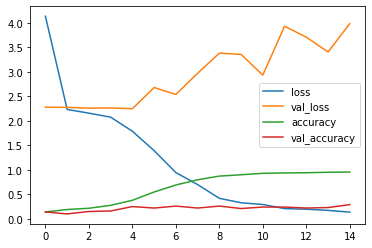

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

##  3) Recurrent neural network

In [20]:
with open('sms.txt', 'r', encoding="utf-8") as f:
    Lines = f.readlines()
c = 0
text = []
for line in Lines:
    help = [0,0]
    if line[:3] == 'ham':
        help[0] = line[4:-1]
        help[0] = help[0].translate(str.maketrans('', '', string.punctuation))
        help[1] = 0
    else:
        help[0] = line[5:-1]
        help[0] = help[0].translate(str.maketrans('', '', string.punctuation))
        help[1] = 1
    text.append(help)
df = pd.DataFrame(text, columns=['sms', 'class'])
df.head()

,sms,class
0,Go until jurong point crazy Available only in ...,0
1,Ok lar Joking wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor U c already then say,0
4,Nah I dont think he goes to usf he lives aroun...,0


In [21]:
df['sms'] = df['sms'].str.lower()
df['sms'] = df['sms'].str.strip()
df['sms'] = df['sms'].str.replace('\d+','number', regex=True)
df['sms'] = df['sms'].str.translate(str.maketrans('', '', string.punctuation))
df.head()

,sms,class
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in number a wkly comp to win fa cup...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0


In [22]:
df['sms'] = df['sms'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [23]:
df.head()

,sms,class
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry number wkly comp win fa cup final t...,1
3,u dun say early hor u c already say,0
4,nah dont think goes usf lives around though,0


In [24]:
tokenizer = Tokenizer(10000)
tokenizer.fit_on_texts(df['sms'])

In [25]:
df_sequence = tokenizer.texts_to_sequences(df['sms'])

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(df_sequence, df['class'], test_size=0.2, random_state=0)
train_pad = pad_sequences(X_train)
test_pad = pad_sequences(X_test)

In [27]:
print(train_pad.shape)
train_pad

(4459, 72)


array([[   0,    0,    0, ...,    1,   27,  217],
       [   0,    0,    0, ...,    0,    0, 2760],
       [   0,    0,    0, ...,    9,  148, 4935],
       ...,
       [   0,    0,    0, ..., 1180,    1, 1514],
       [   0,    0,    0, ...,    8,    1,  236],
       [   0,    0,    0, ...,  321,    6,   60]])

In [40]:
sequential_model = keras.Sequential()

sequential_model.add(keras.layers.Embedding(10000, 64))
sequential_model.add(keras.layers.Dense(64, activation='relu'))
sequential_model.add(keras.layers.Dense(64, activation='relu'))
sequential_model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(32, return_sequences=True)))
sequential_model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(16, return_sequences=False)))
sequential_model.add(keras.layers.Dense(1, activation='sigmoid'))

sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

sequential_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          640000    
                                                                 
 dense_14 (Dense)            (None, None, 64)          4160      
                                                                 
 dense_15 (Dense)            (None, None, 64)          4160      
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 64)         6208      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               2592      
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 1)                

In [41]:
history = sequential_model.fit(train_pad, Y_train, batch_size=16, epochs=10, workers=-1, callbacks = [callback])

Epoch 1/10
279/279 [==============================] - 19s 57ms/step - loss: 0.1668 - accuracy: 0.9370
Epoch 2/10
279/279 [==============================] - 18s 64ms/step - loss: 0.0387 - accuracy: 0.9901
Epoch 3/10
279/279 [==============================] - 16s 58ms/step - loss: 0.0121 - accuracy: 0.9980
Epoch 4/10
279/279 [==============================] - 16s 57ms/step - loss: 0.0107 - accuracy: 0.99661s - los - ETA: 0s - loss: 0
Epoch 5/10
279/279 [==============================] - 17s 62ms/step - loss: 0.0021 - accuracy: 0.9993
Epoch 6/10
279/279 [==============================] - 18s 65ms/step - loss: 5.9325e-04 - accuracy: 1.0000
Epoch 7/10
279/279 [==============================] - 16s 59ms/step - loss: 3.8283e-04 - accuracy: 1.0000
Epoch 8/10
279/279 [==============================] - 15s 54ms/step - loss: 2.8130e-04 - accuracy: 1.0000
Epoch 9/10
279/279 [==============================] - 16s 56ms/step - loss: 2.1350e-04 - accuracy: 1.0000
Epoch 10/10
279/279 [=================